<a href="https://colab.research.google.com/github/atannazerke21-netizen/-231/blob/main/site/en/tutorials/quickstart/beginner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

# Атан Назерке МЕК 231

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Функция заңдылығын үйренуде...
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


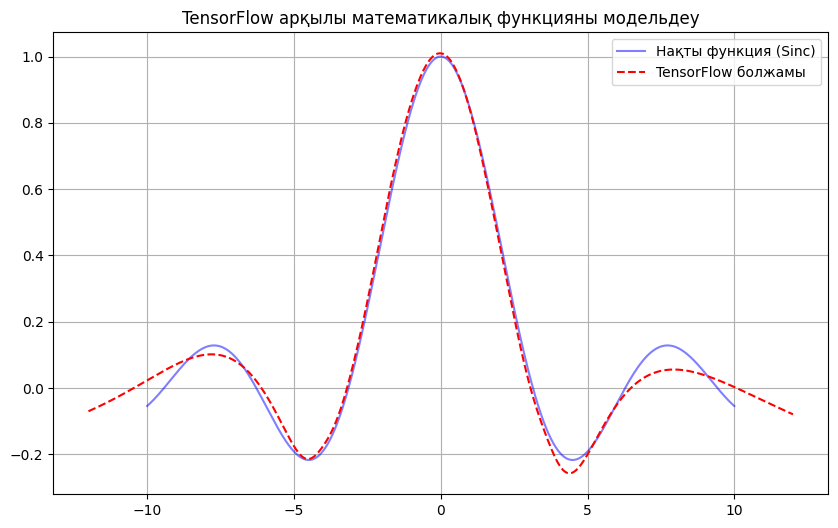

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 1. Деректерді генерациялау (Ғылыми симуляция)
x_train = np.linspace(-10, 10, 1000).reshape(-1, 1)
# Sinc функциясы: sin(x)/x (Математикада маңызды функция)
y_train = np.sinc(x_train / np.pi)

# 2. Нейрондық желі архитектурасы (Математикалық модель)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='tanh', input_shape=(1,)), # 'tanh' математикалық тегіс функцияларға жақсы келеді
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(1) # Шығыс қабаты (сызықтық)
])

# 3. Оңтайландыру (Optimization)
# Математикалық тұрғыдан бұл - минималдау есебі (Loss function minimization)
model.compile(optimizer='adam', loss='mse')

# 4. Модельді оқыту
print("Функция заңдылығын үйренуде...")
model.fit(x_train, y_train, epochs=200, verbose=0)

# 5. Нәтижені тексеру
x_test = np.linspace(-12, 12, 500).reshape(-1, 1)
y_pred = model.predict(x_test)

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, label='Нақты функция (Sinc)', color='blue', alpha=0.5)
plt.plot(x_test, y_pred, label='TensorFlow болжамы', color='red', linestyle='--')
plt.title('TensorFlow арқылы математикалық функцияны модельдеу')
plt.legend()
plt.grid(True)
plt.show()

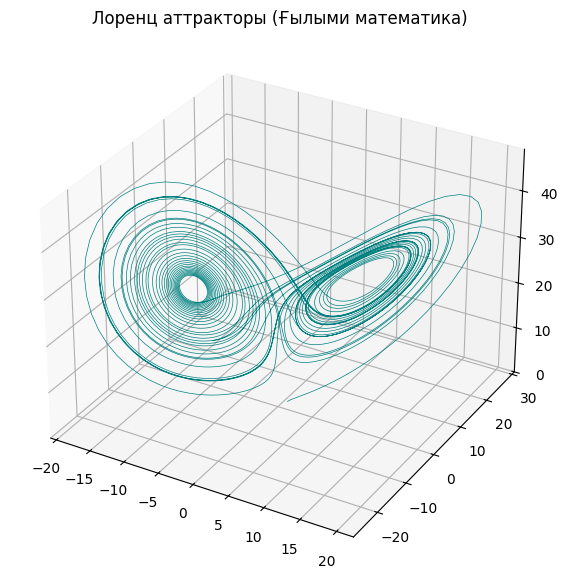

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Лоренц жүйесінің теңдеулері
def lorenz(state, t, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Параметрлер
sigma, rho, beta = 10.0, 28.0, 8.0/3.0
initial_state = [1.0, 1.0, 1.0]
t = np.linspace(0, 40, 4000)

# Теңдеуді шешу
solution = odeint(lorenz, initial_state, t, args=(sigma, rho, beta))

# 3D График салу
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(solution[:, 0], solution[:, 1], solution[:, 2], lw=0.5, color='teal')
ax.set_title("Лоренц аттракторы (Ғылыми математика)")
plt.show()

In [3]:
import tensorflow as tf
import numpy as np

# 1. Деректерді дайындау (x - кіріс, y - нәтиже)
x = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
y = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

# 2. Модель құру (1 қабат, 1 нейрон)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

# 3. Компиляция (қателікті өлшеу және оны түзету әдісі)
model.compile(optimizer='sgd', loss='mean_squared_error')

# 4. Оқыту (500 рет қайталау)
model.fit(x, y, epochs=500, verbose=0)

# 5. Болжау жасау (Егер x = 10 болса, y нешеге тең?)
print("x=10 болғандағы болжам:", model.predict(np.array([10.0])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
x=10 болғандағы болжам: [[18.984226]]


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 1. Деректерді жүктеу (MNIST жинағы)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Деректерді нормализациялау (0-255 мәндерін 0-1 аралығына келтіру)
x_train, x_test = x_train / 255.0, x_test / 255.0

# 2. Нейрондық желінің архитектурасын құру
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),    # 28x28 суретті бір қатарға жаю
    layers.Dense(128, activation='relu'),    # 128 нейроны бар жасырын қабат
    layers.Dropout(0.2),                     # Артық оқытудан (overfitting) сақтау
    layers.Dense(10, activation='softmax')   # 10 цифрға арналған шығыс қабаты
])

# 3. Модельді компиляциялау
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. Модельді оқыту
model.fit(x_train, y_train, epochs=5)

# 5. Нәтижені тексеру
model.evaluate(x_test, y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8594 - loss: 0.4828
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9535 - loss: 0.1526
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9662 - loss: 0.1136
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9734 - loss: 0.0896
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9775 - loss: 0.0729
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9761 - loss: 0.0805


[0.06930312514305115, 0.9785000085830688]

In [5]:
import tensorflow as tf

# 1. Деректерді жүктеу
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# 2. Математикалық модель (Нейрондық желі)
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# 3. Оқыту (Оптимизация)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8599 - loss: 0.4829
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9569 - loss: 0.1423
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9681 - loss: 0.1093
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9727 - loss: 0.0885
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9774 - loss: 0.0696


In [6]:
import tensorflow as tf

# 1. Үлкен көлемді деректерді жүктеу
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Деректерді нормализациялау
x_train, x_test = x_train / 255.0, x_test / 255.0

# 2. Нейрондық желі архитектурасын құру
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# 3. Модельді жаттықтыру мүмкіндігі
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Суреттерді тану моделі оқытылуда...")
model.fit(x_train, y_train, epochs=3)

# 4. Дәлдікті тексеру
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Модельдің дәлдігі: {accuracy * 100:.2f}%")

Суреттерді тану моделі оқытылуда...
Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8617 - loss: 0.4814
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9558 - loss: 0.1503
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9670 - loss: 0.1117
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9692 - loss: 0.1020
Модельдің дәлдігі: 97.42%


In [7]:
import tensorflow as tf
import numpy as np

# 1. Деректерді дайындау (Математикалық жиын)
x = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
y = np.array([-2.0, 1.0, 4.0, 7.0, 10.0, 13.0], dtype=float) # y = 3x + 1

# 2. Нейрондық желіні құру
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

# 3. Модельді компиляциялау
model.compile(optimizer='sgd', loss='mean_squared_error')

# 4. Модельді жаттықтыру (оқыту)
print("Модель оқып жатыр...")
model.fit(x, y, epochs=500, verbose=0)

# 5. Болжам жасау
test_x = 10.0
prediction = model.predict(np.array([test_x]))
print(f"Егер x = {test_x} болса, онда y-тің мәні шамамен: {prediction[0][0]}")
# Күтілетін нәтиже: 3*10 + 1 = 31

Модель оқып жатыр...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Егер x = 10.0 болса, онда y-тің мәні шамамен: 31.002201080322266
